Now that the neural network is built, able to have data passed through it, and capable of 
calculating loss, the next step is to determine how to adjust the weights and biases to decrease the 
loss. Finding an intelligent way to adjust the neurons’ input’s weights and biases to minimize loss 
is the main difficulty of neural networks.

The first option one might think of is randomly changing the weights, checking the loss, and 
repeating this until happy with the lowest loss found. To see this in action, we’ll use a simpler 
dataset than we’ve been working with so far:

In [32]:
class Layer_Dense:
    
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases


class Activation_ReLU:
    
    def forward(self, inputs):
        self.output = np.maximum(0,inputs)
        
        
        
class Activation_Softmax:
    
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis = 1, keepdims = True))
        probabilities = exp_values / np.sum(exp_values, axis = 1, keepdims = True)
        self.output = probabilities
        
        
class Loss:
    
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss
    
    
class Loss_CategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true):
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        samples = len(y_pred)
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true, axis = 1)
        negative_log_likelihoods = - np.log(correct_confidences)
        return negative_log_likelihoods

    

#### Checking with randomly choosing parameters

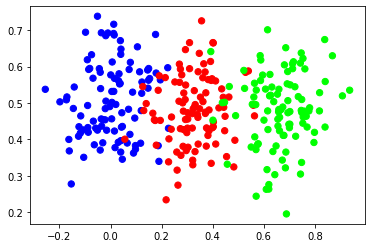

In [33]:
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data
import numpy as np
nnfs.init()
X, y = vertical_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()

In [34]:
# Create dataset
X, y = vertical_data(samples=100, classes=3)

# Create model
dense1 = Layer_Dense(2, 3) # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3) # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

Then create some variables to track the best loss and the associated weights and biases:

In [35]:
# Helper variables
lowest_loss = 9999999 # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

In [36]:
 def itte(itt,lowest_loss):
    for iteration in range(itt):
        # Generate a new set of weights for iteration
        dense1.weights = 0.05 * np.random.randn(2, 3)
        dense1.biases = 0.05 * np.random.randn(1, 3)
        dense2.weights = 0.05 * np.random.randn(3, 3)
        dense2.biases = 0.05 * np.random.randn(1, 3)
        # Perform a forward pass of the training data through this layer
        dense1.forward(X)
        activation1.forward(dense1.output)
        dense2.forward(activation1.output)
        activation2.forward(dense2.output)
        # Perform a forward pass through activation function
        # it takes the output of second dense layer here and returns loss
        loss = loss_function.calculate(activation2.output, y)
        # Calculate accuracy from output of activation2 and targets
        # calculate values along first axis
        predictions = np.argmax(activation2.output, axis=1)
        accuracy = np.mean(predictions == y)
        # If loss is smaller - print and save weights and biases aside
        if loss < lowest_loss:
            print('New set of weights found, iteration:', iteration,
            'loss:', loss, 'acc:', accuracy)
            best_dense1_weights = dense1.weights.copy()
            best_dense1_biases = dense1.biases.copy()
            best_dense2_weights = dense2.weights.copy()
            best_dense2_biases = dense2.biases.copy()
            lowest_loss = loss
    return lowest_loss


Run for 10000 itteration

In [37]:
ls = itte(10000,lowest_loss)

New set of weights found, iteration: 0 loss: 1.1016203 acc: 0.3333333333333333
New set of weights found, iteration: 1 loss: 1.1002508 acc: 0.3333333333333333
New set of weights found, iteration: 2 loss: 1.0992025 acc: 0.3333333333333333
New set of weights found, iteration: 3 loss: 1.0986239 acc: 0.3333333333333333
New set of weights found, iteration: 10 loss: 1.0984299 acc: 0.3333333333333333
New set of weights found, iteration: 22 loss: 1.0976521 acc: 0.36333333333333334
New set of weights found, iteration: 150 loss: 1.0974255 acc: 0.3333333333333333
New set of weights found, iteration: 874 loss: 1.0972673 acc: 0.3333333333333333
New set of weights found, iteration: 894 loss: 1.096895 acc: 0.3333333333333333
New set of weights found, iteration: 1036 loss: 1.0954281 acc: 0.3333333333333333


Now run for 90000 itteration

In [39]:
ls = itte(90000,ls)

New set of weights found, iteration: 28901 loss: 1.0952065 acc: 0.3333333333333333


Now try 1 billion itterations

In [22]:
ls = itte(10000000,ls)

New set of weights found, iteration: 23617 loss: 1.0950118 acc: 0.3333333333333333
New set of weights found, iteration: 155077 loss: 1.0949786 acc: 0.3333333333333333
New set of weights found, iteration: 231489 loss: 1.0949497 acc: 0.3333333333333333
New set of weights found, iteration: 310956 loss: 1.094616 acc: 0.6666666666666666
New set of weights found, iteration: 795537 loss: 1.094502 acc: 0.41
New set of weights found, iteration: 1743537 loss: 1.0943758 acc: 0.3333333333333333
New set of weights found, iteration: 2504288 loss: 1.094077 acc: 0.3333333333333333


KeyboardInterrupt: 

Instead of choosing parameters randomly now adjust and update these randomly and check loss if it decrease, if not then revert the changes

In [40]:
 def itte(itt,lowest_loss):
    # Helper variables
    lowest_loss = 9999999 # some initial value
    best_dense1_weights = dense1.weights.copy()
    best_dense1_biases = dense1.biases.copy()
    best_dense2_weights = dense2.weights.copy()
    best_dense2_biases = dense2.biases.copy()
    for iteration in range(itt):
        # Generate a new set of weights for iteration
        dense1.weights += 0.05 * np.random.randn(2, 3)
        dense1.biases += 0.05 * np.random.randn(1, 3)
        dense2.weights += 0.05 * np.random.randn(3, 3)
        dense2.biases += 0.05 * np.random.randn(1, 3)
        # Perform a forward pass of the training data through this layer
        dense1.forward(X)
        activation1.forward(dense1.output)
        dense2.forward(activation1.output)
        activation2.forward(dense2.output)
        # Perform a forward pass through activation function
        # it takes the output of second dense layer here and returns loss
        loss = loss_function.calculate(activation2.output, y)
        # Calculate accuracy from output of activation2 and targets
        # calculate values along first axis
        predictions = np.argmax(activation2.output, axis=1)
        accuracy = np.mean(predictions == y)
        # If loss is smaller - print and save weights and biases aside
        if loss < lowest_loss:
            print('New set of weights found, iteration:', iteration,
            'loss:', loss, 'acc:', accuracy)
            best_dense1_weights = dense1.weights.copy()
            best_dense1_biases = dense1.biases.copy()
            best_dense2_weights = dense2.weights.copy()
            best_dense2_biases = dense2.biases.copy()
            lowest_loss = loss
        else:
            dense1_weights = dense1.weights.copy()
            dense1_biases = dense1.biases.copy()
            dense2_weights = dense2.weights.copy()
            dense2_biases = dense2.biases.copy()
    return lowest_loss

Let's run for 100000

In [41]:
ls = itte(100000,lowest_loss)

New set of weights found, iteration: 0 loss: 1.0992887 acc: 0.3333333333333333
New set of weights found, iteration: 2 loss: 1.0983642 acc: 0.3333333333333333
New set of weights found, iteration: 110 loss: 1.0810732 acc: 0.3333333333333333
New set of weights found, iteration: 15383 loss: 1.0806994 acc: 0.3333333333333333
New set of weights found, iteration: 15384 loss: 1.070425 acc: 0.3333333333333333
New set of weights found, iteration: 15385 loss: 1.0525627 acc: 0.3333333333333333
New set of weights found, iteration: 15386 loss: 1.0360421 acc: 0.3333333333333333
New set of weights found, iteration: 15387 loss: 1.0242617 acc: 0.3333333333333333
New set of weights found, iteration: 15406 loss: 1.0199318 acc: 0.3333333333333333
New set of weights found, iteration: 15428 loss: 1.0194132 acc: 0.3333333333333333
New set of weights found, iteration: 15430 loss: 1.0193435 acc: 0.3333333333333333
New set of weights found, iteration: 15431 loss: 1.008964 acc: 0.3333333333333333
New set of weigh

Let's try for our spiral dataset

In [45]:
from nnfs.datasets import spiral_data
X,y = spiral_data(samples = 100, classes = 3)

In [46]:
ls = itte(100000,lowest_loss)

New set of weights found, iteration: 0 loss: 10.627596 acc: 0.3333333333333333
New set of weights found, iteration: 2 loss: 10.627544 acc: 0.3333333333333333
New set of weights found, iteration: 5 loss: 10.624963 acc: 0.3333333333333333
New set of weights found, iteration: 6 loss: 10.620773 acc: 0.3333333333333333
New set of weights found, iteration: 7 loss: 10.614422 acc: 0.3333333333333333
New set of weights found, iteration: 10 loss: 10.610464 acc: 0.3333333333333333
New set of weights found, iteration: 12 loss: 10.607583 acc: 0.3333333333333333
New set of weights found, iteration: 35 loss: 10.605816 acc: 0.3333333333333333
New set of weights found, iteration: 38 loss: 10.605524 acc: 0.3333333333333333
New set of weights found, iteration: 39 loss: 10.596582 acc: 0.3333333333333333
New set of weights found, iteration: 57 loss: 10.595334 acc: 0.3333333333333333
New set of weights found, iteration: 62 loss: 10.591566 acc: 0.3333333333333333
New set of weights found, iteration: 68 loss:

New set of weights found, iteration: 18554 loss: 8.716658 acc: 0.3333333333333333
New set of weights found, iteration: 18555 loss: 8.67883 acc: 0.3333333333333333
New set of weights found, iteration: 18556 loss: 8.513087 acc: 0.3333333333333333
New set of weights found, iteration: 18557 loss: 8.503931 acc: 0.3333333333333333
New set of weights found, iteration: 18558 loss: 8.488506 acc: 0.3333333333333333
New set of weights found, iteration: 18559 loss: 8.396222 acc: 0.3333333333333333
New set of weights found, iteration: 18577 loss: 8.380324 acc: 0.3333333333333333
New set of weights found, iteration: 18578 loss: 8.291422 acc: 0.3333333333333333
New set of weights found, iteration: 18585 loss: 8.248779 acc: 0.3333333333333333
New set of weights found, iteration: 18586 loss: 8.215389 acc: 0.3333333333333333
New set of weights found, iteration: 18590 loss: 8.213177 acc: 0.3333333333333333
New set of weights found, iteration: 18591 loss: 8.143716 acc: 0.3333333333333333
New set of weight